In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [12]:
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")


In [13]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [14]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session=Session(bind=engine)

In [17]:
# inspector=inspect(engine)
# inspector.get_table_names()

['measurement', 'station']

In [18]:
# # Getting all the columns in Measurement table
# columns_mea=inspector.get_columns('measurement')
# for row in columns_mea:
#     print(row['name'],row['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation= session.query(Measurement.date,Measurement.prcp).order_by(Measurement.date.desc()).limit(12).all()
# this is the last date of precipitation
print(f"Date and precipitation data is : {precipitation[0]}")

Date and precipitation data is : ('2017-08-23', 0.0)


In [20]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
# print("Query Date :", query_date)
query_date

datetime.date(2016, 8, 23)

In [21]:
# Perform a query to retrieve the data and precipitation scores
output=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=query_date).all()
for row in output:
    print(row)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-07-13', 0.32)
('2017-07-14', 0.2)
('2017-07-15', 0.05)
('2017-07-16', 0.1)
('2017-07-17', 0.21)
('2017-07-18', 0.05)
('2017-07-19', 0.05)
('2017-07-20', 0.06)
('2017-07-21', 0.03)
('2017-07-22', 0.2)
('2017-07-23', 0.2)
('2017-07-24', 0.61)
('2017-07-25', 0.11)
('2017-07-26', 0.12)
('2017-07-27', 0.01)
('2017-07-28', 0.09)
('2017-07-29', 0.23)
('2017-07-30', 0.0)
('2017-07-31', 0.0)
('2017-08-04', 0.0)
('2017-08-05', 0.06)
('2017-08-06', 0.0)
('2017-08-13', 0.0)
('2017-08-14', 0.0)
('2017-08-15', 0.32)
('2017-08-16', 0.12)
('2017-08-17', 0.01)
('2017-08-18', 0.06)
('2016-08-23', 0.7)
('2016-08-24', 1.45)
('2016-08-25', 0.11)
('2016-08-27', None)
('2016-08-28', 2.07)
('2016-08-29', 0.9)
('2016-08-30', 0.05)
('2016-08-31', 2.46)
('2016-09-01', 0.01)
('2016-09-02', 0.03)
('2016-09-03', 1.0)
('2016-09-04', 0.44)
('2016-09-05', 0.18)
('2016-09-06', 1.0)
('2016-09-07', 1.35)
('2016-09-08', 0.15)
('2016-09-09', 0.35)
('2016-09-10', 1.16)
('2016-09-11', 0.6)
('2016-09-12', 1.04)
('2016-

In [43]:
# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df=pd.DataFrame(output, columns=['date','Prec_scores'])
climate_df

,date,Prec_scores
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [44]:
# df=pd.DataFrame(output)
rename = climate_df.rename(columns={"prcp":'Prec_scores'}).sort_values('date', ascending=True)

rename.set_index("date",inplace=True)
# drop the dataframe by scores 'NaN'
clear_climate_df =rename.dropna(how='any')
clear_climate_df
# Use Pandas Plotting with Matplotlib to plot the data


,Prec_scores
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [16]:
# clear_climate_df.index=pd.to_datetime(clear_climate_df.index)

In [17]:
# clear_climate_df.index

DatetimeIndex(['2016-08-23', '2016-08-23', '2016-08-23', '2016-08-23',
               '2016-08-23', '2016-08-23', '2016-08-24', '2016-08-24',
               '2016-08-24', '2016-08-24',
               ...
               '2017-08-21', '2017-08-21', '2017-08-21', '2017-08-22',
               '2017-08-22', '2017-08-22', '2017-08-23', '2017-08-23',
               '2017-08-23', '2017-08-23'],
              dtype='datetime64[ns]', name='date', length=2021, freq=None)

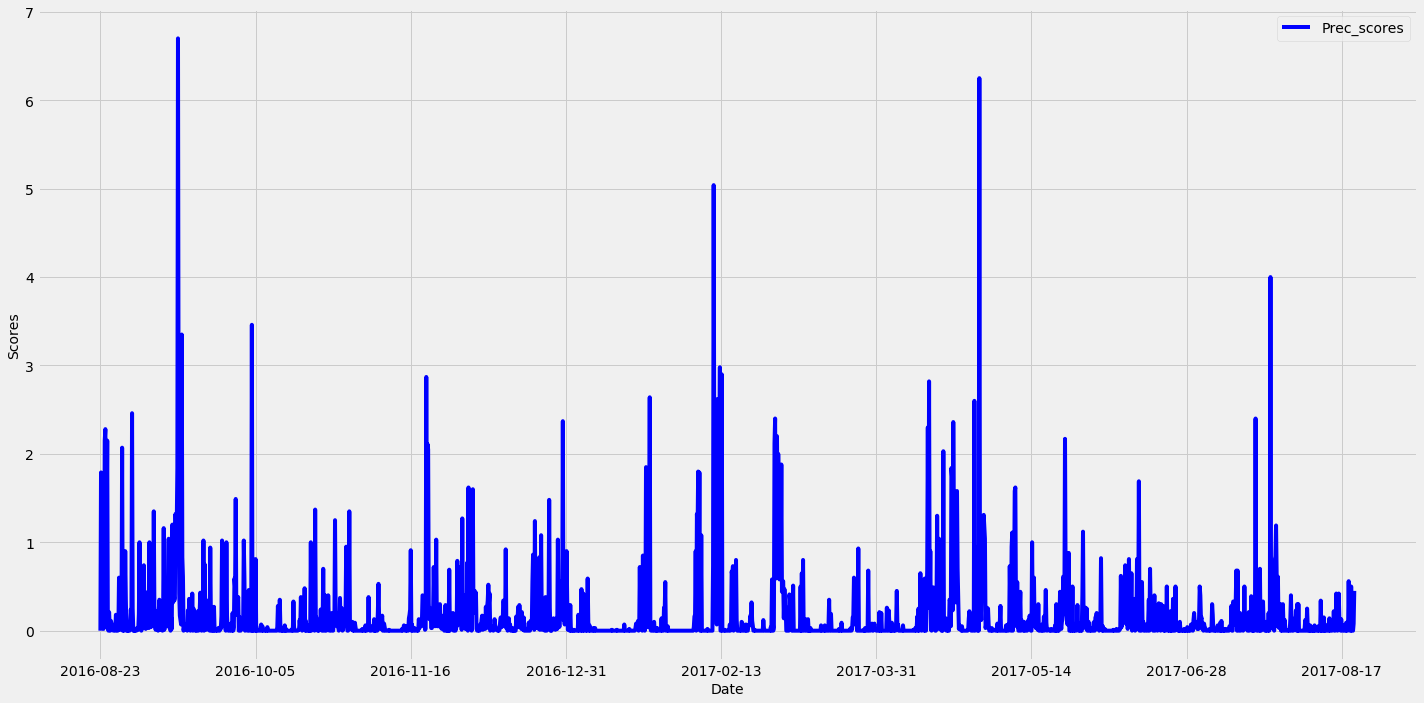

In [54]:
chart1=clear_climate_df.plot(figsize=(20,10),color='blue')
chart1.set_xlabel("Date", fontsize=14)
chart1.set_ylabel("Scores",fontsize=14)
plt.tight_layout()
plt.savefig("Images/Bar_Chart1.png")
plt.show()

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
statistic_preci= clear_climate_df['Prec_scores'].describe()
statistic_preci_df=pd.DataFrame(statistic_preci)
statistic_preci_df

,Prec_scores
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [48]:
# Getting all the columns in Measurement table
columns_mea=inspector.get_columns('measurement')
for row in columns_mea:
    print(row['name'],row['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [49]:
# Getting all the columns in Station table
columns_sta=inspector.get_columns('station')
for row in columns_sta:
    print(row['name'],row['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [50]:
# Design a query to show how many stations are available in this dataset?
dataset_num= session.query(Station.station).count()
dataset_num

9

In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station= session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.round(func.avg(Measurement.tobs),2)).\
        filter(Measurement.station==active_station[0][0]).all()


[(54.0, 85.0, 71.66)]

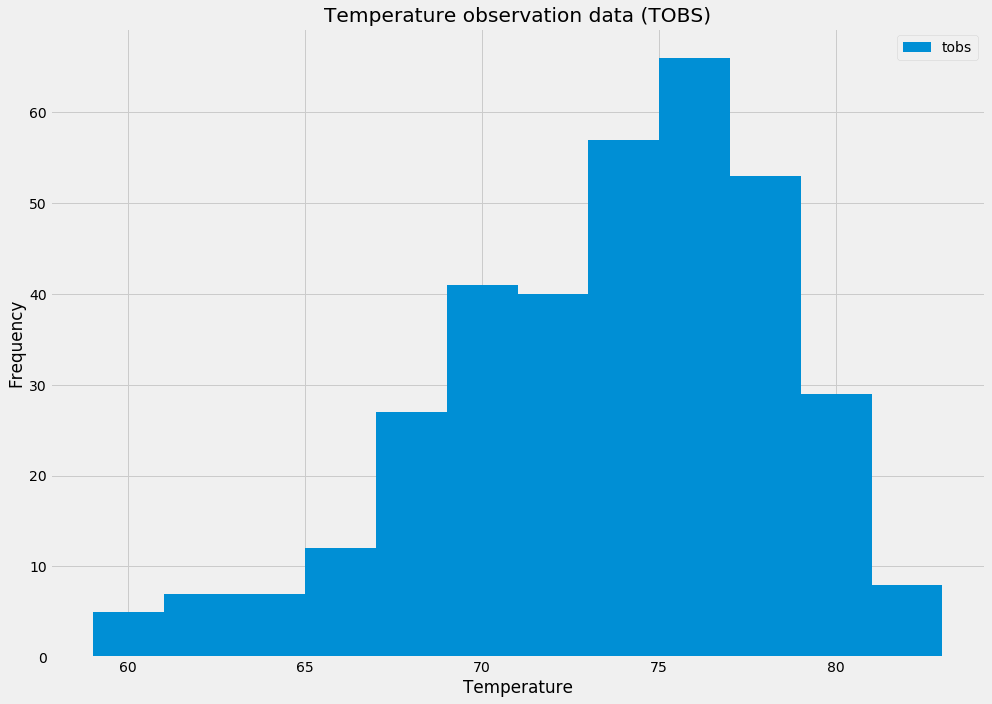

In [56]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_12_months= session.query(Measurement.tobs).filter(Measurement.station==active_station[0][0]).\
            filter(Measurement.date>=query_date).all()

df=pd.DataFrame(query_12_months)
df.plot(kind='hist',bins=12, figsize=(14,10))
plt.xlabel('Temperature')
plt.title('Temperature observation data (TOBS)')
plt.tight_layout()
plt.savefig("Images/Histogram.png")
plt.show()

## Bonus Challenge Assignment

In [57]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [58]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
